## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [2]:
DataSet=pd.read_csv('arruela_.csv')

In [3]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,13:00:06,53,25,69,81,68,1,0
1,13:00:07,53,26,89,87,56,1,0
2,13:00:08,53,27,68,69,55,1,0
3,13:00:09,53,28,36,50,80,1,0
4,13:00:10,53,29,71,72,50,1,0


In [4]:
DataSet.drop(['Hora'],axis=1,inplace=True)

In [5]:
DataSet.head()

,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,53,25,69,81,68,1,0
1,53,26,89,87,56,1,0
2,53,27,68,69,55,1,0
3,53,28,36,50,80,1,0
4,53,29,71,72,50,1,0


In [6]:
DataSet.describe()

,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,53.126437,58.310345,59.777778,63.697318,54.747126,0.375479,0.624521
std,1.174779,9.199888,17.293075,30.629366,35.548413,0.485177,0.485177
min,53.000000,25.000000,3.000000,6.000000,17.000000,0.000000,0.000000
25%,53.000000,54.000000,50.000000,46.000000,38.000000,0.000000,0.000000
50%,53.000000,64.000000,59.000000,56.000000,44.000000,0.000000,1.000000
75%,53.000000,64.000000,69.000000,68.000000,54.000000,1.000000,1.000000
max,64.000000,64.000000,120.000000,201.000000,251.000000,1.000000,1.000000


### Váriaveis do *Dataset*

In [7]:
DataSet.columns

Index(['Tamanho', 'Referencia', 'NumAmostra', 'Area', 'Delta', 'Output1',
       'Output2'],
      dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

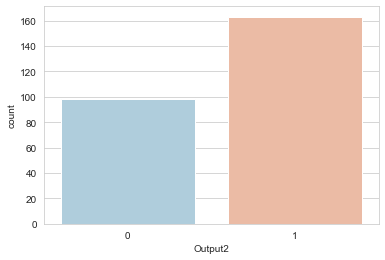

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

#### Gráfico da distribuição das áreas das peças

C:\Users\Felipe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


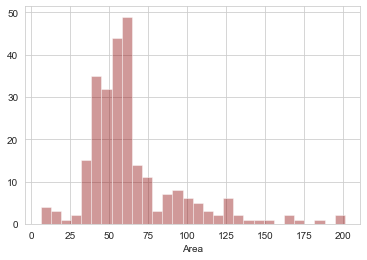

In [9]:
sns.distplot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

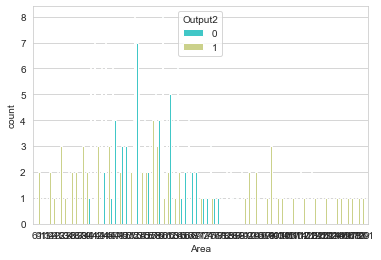

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

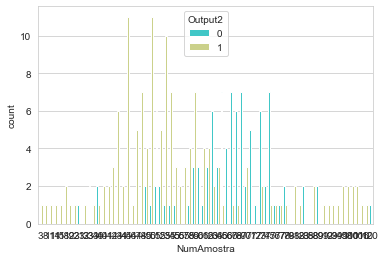

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

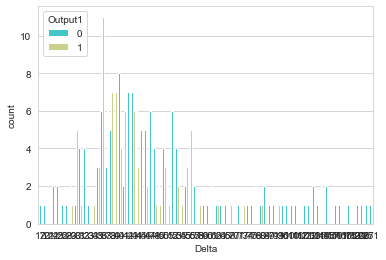

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [13]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

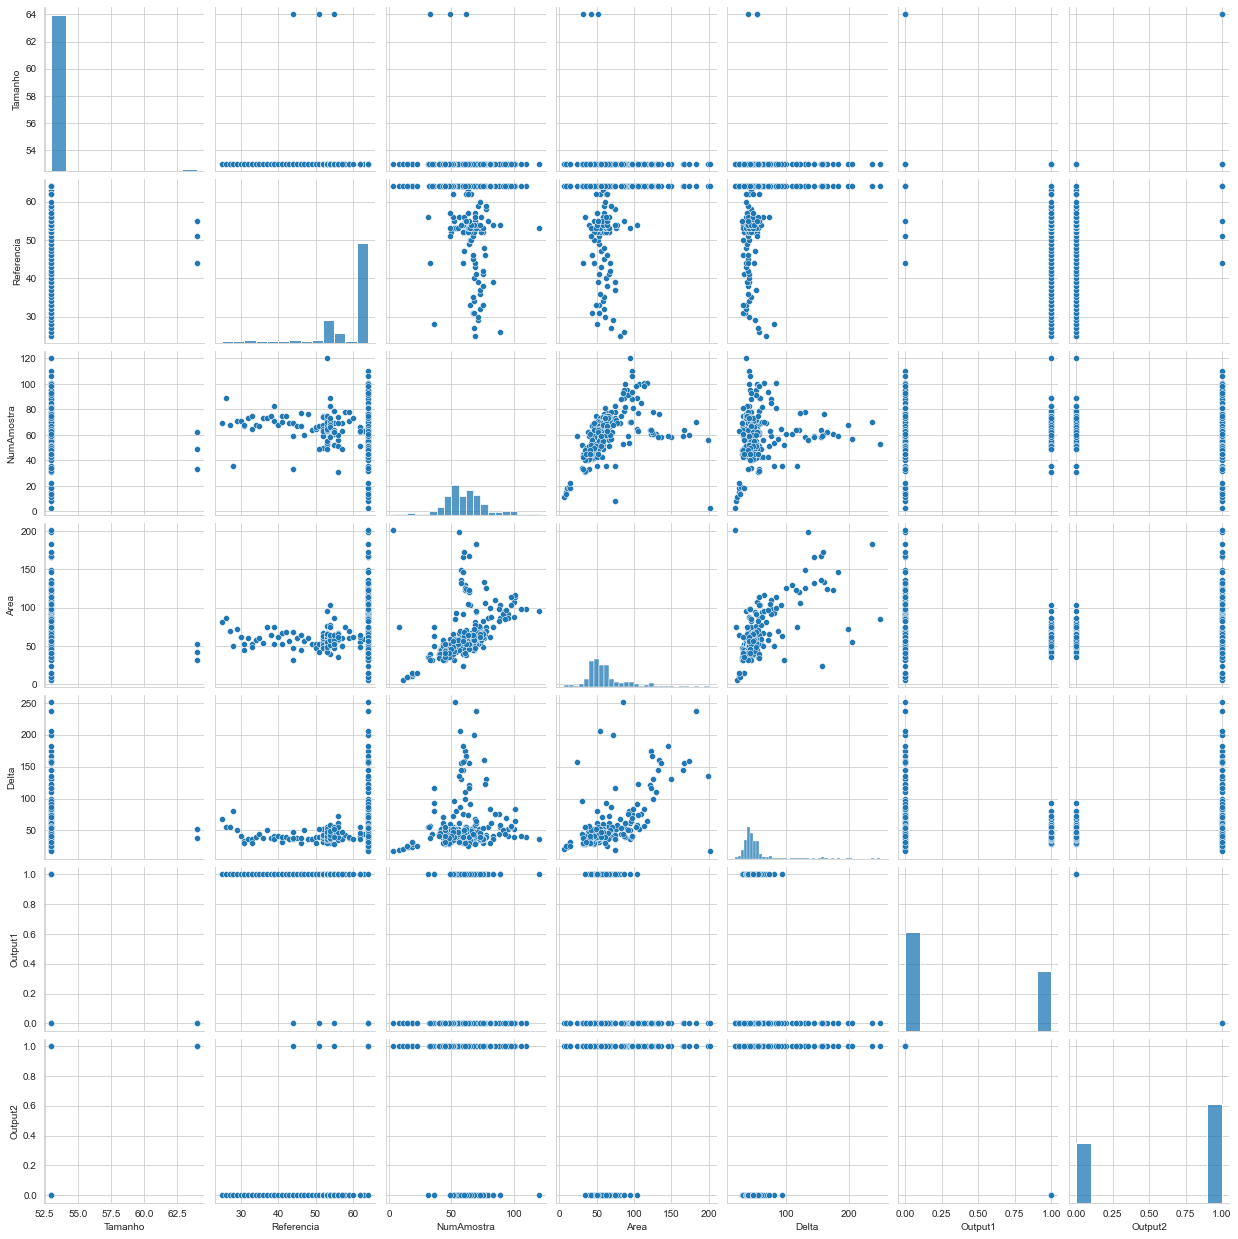

In [14]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

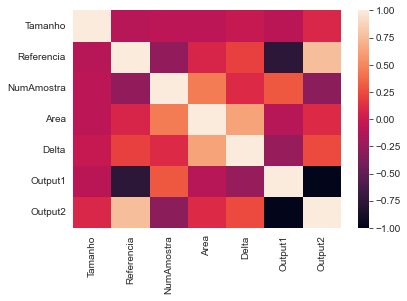

In [15]:
sns.heatmap(DataSet.corr())
plt.show()

## Normalização dos Dados

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled=scaler.fit_transform(DataSet)
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['NumAmostra', 'Area', 'Delta', 'Tamanho', 'Referencia', 'Output1','Output2'])


In [17]:
DataSetScaled.head()

,NumAmostra,Area,Delta,Tamanho,Referencia,Output1,Output2
0,-0.107833,-3.627690,0.534314,0.565990,0.373528,1.289676,-1.289676
1,-0.107833,-3.518784,1.693069,0.762257,0.035312,1.289676,-1.289676
2,-0.107833,-3.409879,0.476377,0.173457,0.007127,1.289676,-1.289676
3,-0.107833,-3.300973,-1.377630,-0.448055,0.711745,1.289676,-1.289676
4,-0.107833,-3.192067,0.650190,0.271590,-0.133796,1.289676,-1.289676


### Conjunto de dados para o treinamento

In [18]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=200)

print(y_test)
print(X_test)

     Output1  Output2
145        0        1
124        0        1
142        0        1
256        0        1
257        0        1
..       ...      ...
86         1        0
104        0        1
100        0        1
63         1        0
74         1        0

[79 rows x 2 columns]
     NumAmostra      Area     Delta   Tamanho  Referencia
145   -0.107833  0.619637 -0.334751 -0.349921   -0.331089
124   -0.107833  0.619637  0.070813  2.136125    1.557285
142   -0.107833  0.619637  1.808944  0.925813   -0.105612
256   -0.107833  0.619637  0.881941  0.598701   -0.021058
257   -0.107833  0.619637 -2.188758 -1.625656   -0.838414
..          ...       ...       ...       ...         ...
86    -0.107833 -0.469422  0.650190 -0.022810   -0.218350
104   -0.107833  0.619637 -0.334751 -0.219077   -0.190166
100   -0.107833  0.619637 -1.087942 -0.644322   -0.161981
63    -0.107833 -0.687233  0.302564 -0.022810   -0.049242
74    -0.107833 -0.578327  0.881941  0.042612   -0.500197

[79 rows x 5 col

## Criando o Modelo de MPL

In [20]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 5
N_hidden = 8
N_output = 2
learnrate = 0.2

## Inicialização dos pesos da MPL (Aleatório)

In [21]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[-0.06065063  0.12795656 -0.04030935  0.05096047  0.13957689  0.07889901
  -0.08865872  0.02450335]
 [-0.14618002  0.016706   -0.06796144 -0.09617746 -0.08047658 -0.03810812
   0.18107042 -0.00274625]
 [-0.01920054 -0.05233243  0.18710654 -0.00606157  0.0385873   0.0051535
   0.05887019 -0.08211338]
 [ 0.14195126  0.11076799  0.02417666  0.02304635  0.07217995 -0.11700697
  -0.05508822 -0.05389878]
 [-0.04873753 -0.0589636  -0.22190938  0.26813445 -0.09451404  0.07158793
  -0.00995746  0.12587123]]
Pesos da Camada de Saída:
[[ 0.01239937 -0.18173483]
 [ 0.21209337 -0.00102336]
 [-0.07370105  0.14611245]
 [ 0.15558421  0.03791045]
 [ 0.00368948  0.22625005]
 [-0.15282067  0.04031633]
 [ 0.0104764   0.06470697]
 [ 0.086389    0.00522216]]


## Algoritmo Backpropagation

In [22]:
epochs = 100000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.2431099013725351
Erro quadrático no treinamento:  0.05903346469184324
Erro quadrático no treinamento:  0.02114174892837311
Erro quadrático no treinamento:  0.013335632522752033
Erro quadrático no treinamento:  0.010486324172923387
Erro quadrático no treinamento:  0.009051660453793553
Erro quadrático no treinamento:  0.008188402149569497
Erro quadrático no treinamento:  0.00760936571694938
Erro quadrático no treinamento:  0.007192385776796271
Erro quadrático no treinamento:  0.00687725548776271
Erro quadrático no treinamento:  0.006631020957950433
Erro quadrático no treinamento:  0.0064341470184242884
Erro quadrático no treinamento:  0.006274286423302412
Erro quadrático no treinamento:  0.006143203686017676
Erro quadrático no treinamento:  0.006035144531872468
Erro quadrático no treinamento:  0.005945921372891985
Erro quadrático no treinamento:  0.005872376092226603
Erro quadrático no treinamento:  0.005812051900089791
Erro quadrático no treinamento:  

In [23]:
### Gráfico da Evolução do Erro

#A primeira coisa que eu vi é que a evolução do erro não progredia, aí ja capei boa parte do loop, oq n significa q n seja nescessário, só significa que pra esse caso em especifico não precisava de tantas epocas

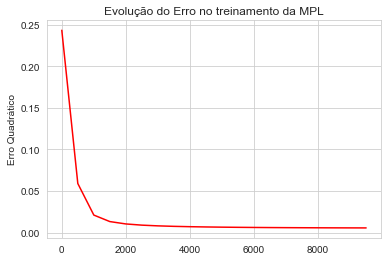

In [24]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

## Validação do modelo

In [25]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
predictions=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)

#-------------------------------------------    
    
#Cálculo do Erro da Predição
        ## TODO: Cálculo do Erro        
        if (output[0]>output[1]):
            if (yi[0]>yi[1]):
                predictions+=1
                
        if (output[1]>=output[0]):
            if (yi[1]>yi[0]):
                predictions+=1

print("A Acurácia da Predição é de: {:.3f}".format(predictions/n_records))
 


A Acurácia da Predição é de: 0.962
